In [2]:
import mglearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [5]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
 oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_estimators=5, n_jobs=1,
                       random_state=2)

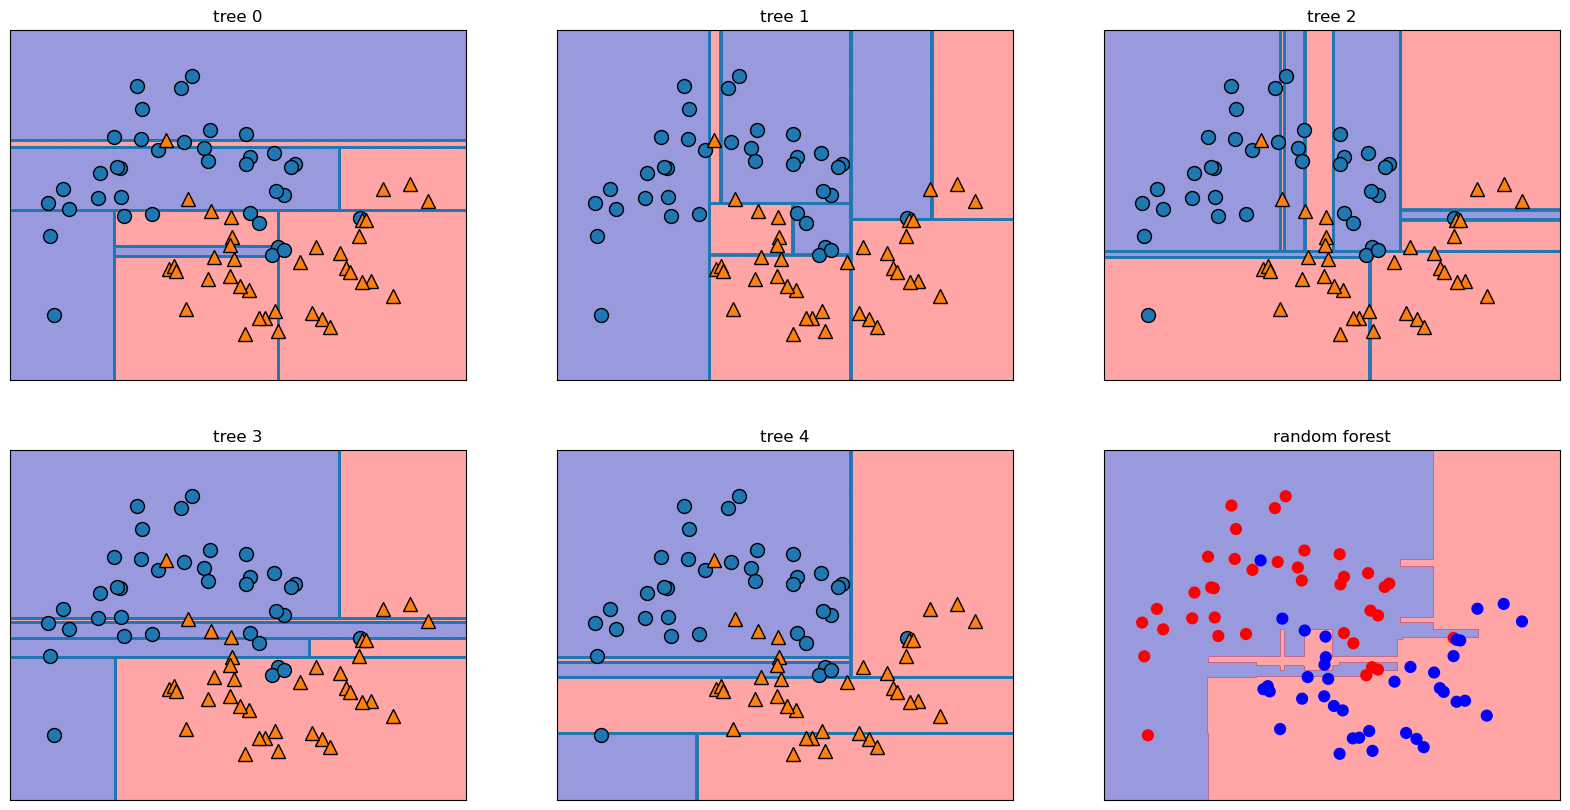

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("tree %d" % i)
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=10, random_state=40,max_features=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=10, random_state=40)

In [8]:
forest.feature_importances_

array([0.03296034, 0.00668485, 0.00483439, 0.01356704, 0.00713188,
       0.0877293 , 0.08336886, 0.03541765, 0.00684627, 0.0175936 ,
       0.02178568, 0.00573146, 0.04947552, 0.02473331, 0.01366897,
       0.01327183, 0.03010165, 0.0055807 , 0.01665954, 0.00441947,
       0.01356997, 0.01867426, 0.0941881 , 0.21957483, 0.01398823,
       0.01371378, 0.01779986, 0.07092815, 0.04955342, 0.00644709])

In [9]:
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.992958
accuracy on test set: 0.986014


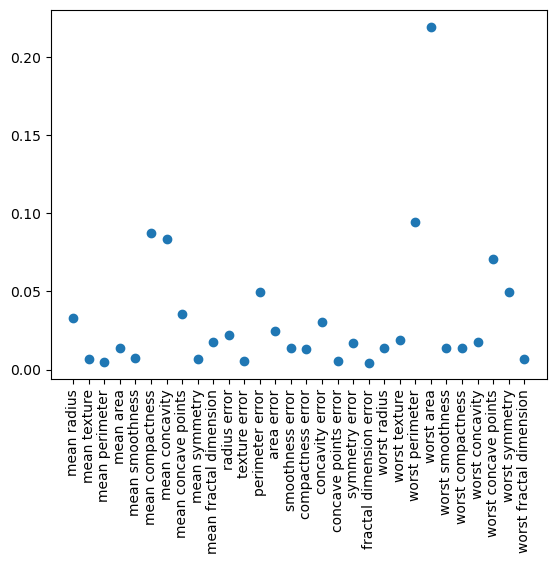

In [10]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)

In [12]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.965035


In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [18]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


In [20]:
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=50)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


In [21]:
gbrt.feature_importances_

array([3.12564430e-04, 1.69682484e-02, 6.62164783e-05, 7.27638824e-04,
       5.55312912e-04, 8.00354309e-04, 9.30851782e-04, 5.54298243e-01,
       2.59756895e-03, 7.27560630e-04, 3.51259557e-03, 7.59491229e-04,
       9.65862224e-03, 2.14376067e-02, 1.70185980e-03, 1.98002560e-03,
       5.48327032e-03, 1.21651349e-04, 7.82200967e-05, 3.82610843e-03,
       2.88959226e-02, 3.54908893e-02, 1.03180724e-01, 7.35864408e-02,
       3.61774970e-03, 8.56581523e-03, 2.21724320e-02, 9.01325035e-02,
       4.27327197e-03, 3.54023932e-03])

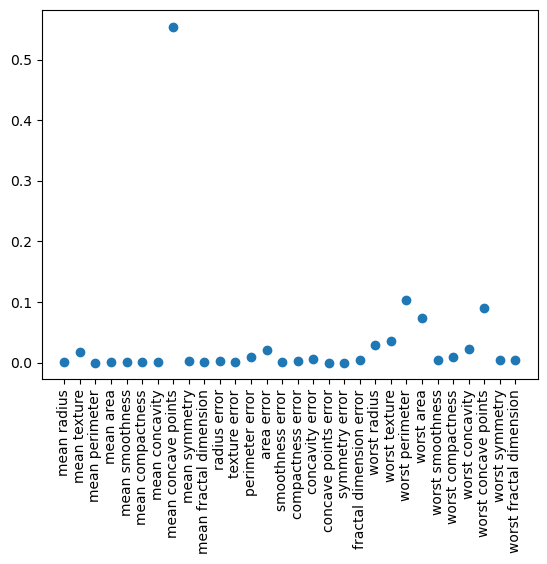

In [22]:
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);